# PyCrumbs

## Introduction
PyCrumbs is a Python library for visualizing trajectories from longitudinal event data. It was designed with healthcare data in mind (e.g. medications & treatment trajectories) but generalizes to other domains as well.

At the base of PyCrumbs is an `Event` representing a single timestamped observation for an "entity" (e.g. patient). The library groups and tracks events across unique entities.

Entities can be transformed into a trajectory tree which represents transitions between observations. At the root, the patients don't have any observations (empty trajectory). They subsequently transition into child nodes based on the type of observation they acquire.

## Example

Let's begin by mocking up 10k observations for 1000 patients, corresponding to 5 discrete types of medications.

In [1]:
from pycrumbs import *

df = mock_data(n_events=10000, n_entities=1000, n_observations=5)
df.head(10)

,timestamp,observation,entity
0,2019-05-31 21:05:25.355117,MEDICATION_1,PATIENT_774
1,2019-02-13 12:05:55.233914,MEDICATION_0,PATIENT_344
2,2019-01-27 02:49:00.921409,MEDICATION_2,PATIENT_55
3,2019-07-22 10:47:34.983793,MEDICATION_0,PATIENT_284
4,2019-09-30 16:27:38.617548,MEDICATION_3,PATIENT_130
5,2019-05-19 01:37:47.495633,MEDICATION_3,PATIENT_459
6,2019-06-23 07:45:25.729100,MEDICATION_1,PATIENT_899
7,2019-02-25 09:34:21.037985,MEDICATION_2,PATIENT_838
8,2019-03-26 17:02:33.282783,MEDICATION_4,PATIENT_214
9,2019-03-05 18:35:58.703941,MEDICATION_2,PATIENT_909


Now, let's convert the data frame to a list of `Event`s:

In [2]:
events = Event.from_dataframe(df, "timestamp", "observation", "entity")

With events in hand, we can build the trajectory tree. Note that root has depth 0, so `max_depth=2` will build a tree with 3 levels.

In [3]:
tree = build_tree(events, max_depth=2, min_entities_per_node=10)

The tree can be plotted by calling `draw_tree`. Here, we color nodes randomly and display acquired observations on each edge.

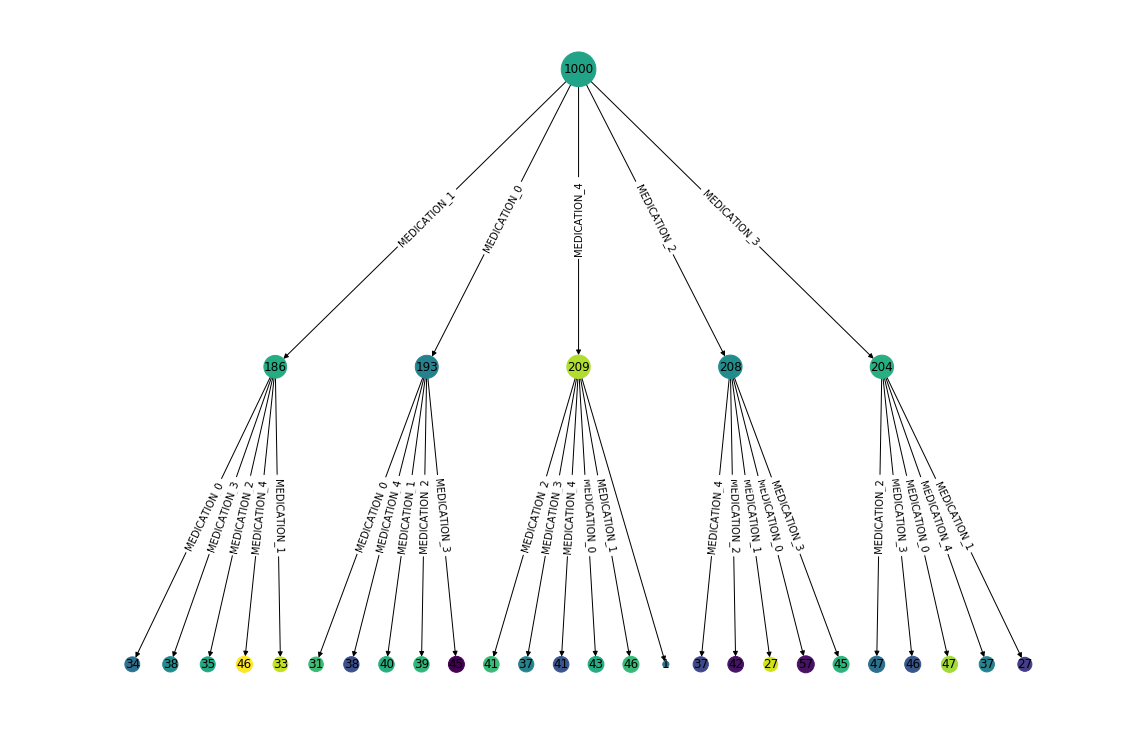

In [4]:
plt.figure(figsize=(15, 10))
draw_tree(tree, 
          get_color=lambda node: npr.rand(),
          get_edge_label=new_observation)

The defaults can be easily customized by passing different functions. For example, below we add transition probabilities to each edge.

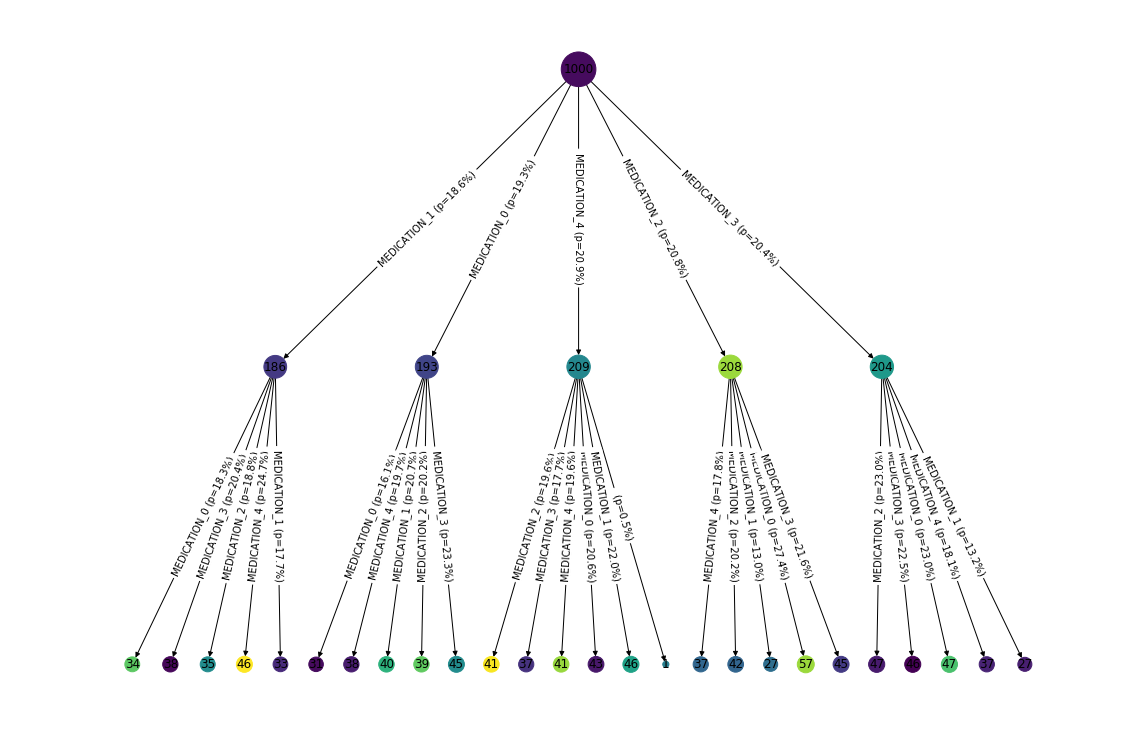

In [5]:
def my_edge_label(parent, child):
    return "{} (p={:.1%})".format(new_observation(parent, child),
                                 1.0 * len(child.entities) / len(parent.entities))

plt.figure(figsize=(15, 10))
draw_tree(tree, 
          get_color=lambda node: npr.rand(),
          get_edge_label=my_edge_label)